In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DOCENCIA/Maestría/Maestria IoT/MAESTRIA-IOT/DISEÑO-INFRAESTRUCTURAS-INTELIGENTES/Guía de Laboratorio/EDGE-COMPUTING/LAB0/dataset_humidity.csv")

In [ ]:
dataset.head(2)

,year,month,day,hour,minute,second,recnt_Humidity,recnt_Temperature,Target_Humidity
0,2020.0,2.0,4.0,6.0,30.0,0.0,32.33,80.33,28.6
1,2020.0,2.0,4.0,6.0,40.0,0.0,28.60,82.00,27.4


In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [ ]:
x

array([[2.020e+03, 2.000e+00, 4.000e+00, ..., 0.000e+00, 3.233e+01,
        8.033e+01],
       [2.020e+03, 2.000e+00, 4.000e+00, ..., 0.000e+00, 2.860e+01,
        8.200e+01],
       [2.020e+03, 2.000e+00, 4.000e+00, ..., 0.000e+00, 2.740e+01,
        8.360e+01],
       ...,
       [2.020e+03, 5.000e+00, 2.000e+01, ..., 0.000e+00, 2.940e+01,
        9.520e+01],
       [2.020e+03, 5.000e+00, 2.000e+01, ..., 0.000e+00, 3.000e+01,
        9.500e+01],
       [2.020e+03, 5.000e+00, 2.000e+01, ..., 0.000e+00, 3.000e+01,
        9.500e+01]])

In [ ]:
y

array([[28.6],
       [27.4],
       [26.4],
       ...,
       [30. ],
       [30. ],
       [30. ]])

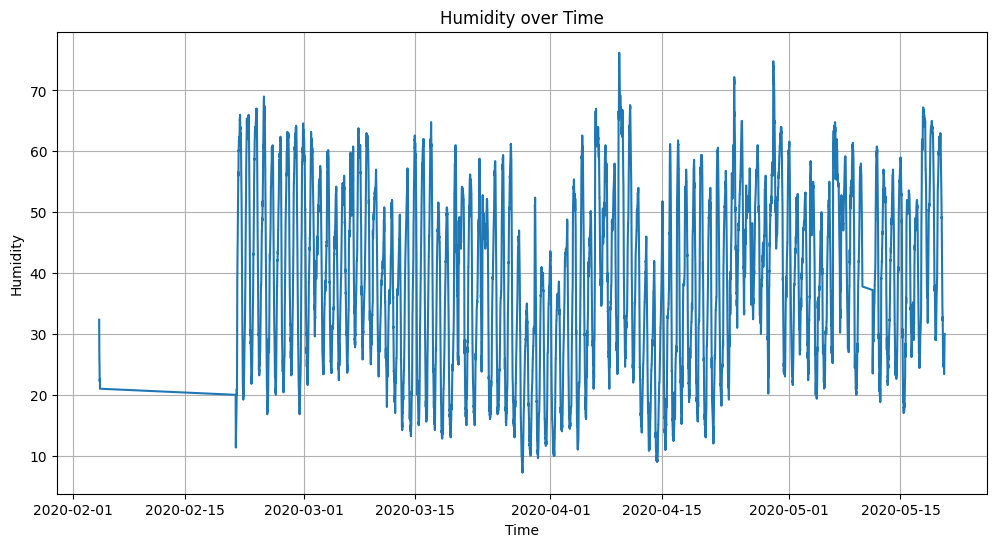

In [ ]:
# Create a datetime column for plotting
dataset['datetime'] = pd.to_datetime(dataset[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['recnt_Humidity'])
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Humidity over Time')
plt.grid(True)
plt.show()

Training Loss (MSE): 67.71316816914513
Validation Loss (MSE): 198.49825824820428


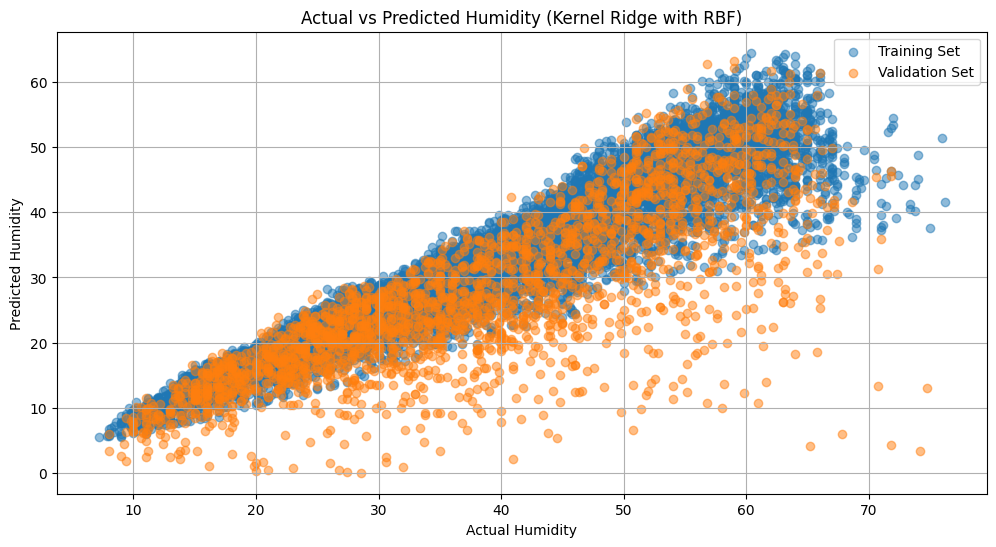

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt # Import matplotlib

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Kernel Ridge model with RBF kernel
rbf_model_with_val = KernelRidge(kernel='rbf', gamma=0.1) # You might need to tune gamma

# Train the model
rbf_model_with_val.fit(x_train, y_train)

# Predict on training and validation sets
y_train_pred = rbf_model_with_val.predict(x_train)
y_val_pred = rbf_model_with_val.predict(x_val)

# Calculate training and validation loss (MSE)
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)
print(f"Training Loss (MSE): {train_loss}")
print(f"Validation Loss (MSE): {val_loss}")

# Plot actual vs predicted values for training and validation sets
plt.figure(figsize=(12, 6))

plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Set')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validation Set')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Actual vs Predicted Humidity (Kernel Ridge with RBF)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
load_model = tf.keras.models.load_model('Humidity_predictor_model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(load_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("humidity_predictor.tflite", "wb").write(tflite_model)

ValueError: File not found: filepath=Humidity_predictor_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
!xxd -i humidity_predictor.tflite > humidity_predictor.h

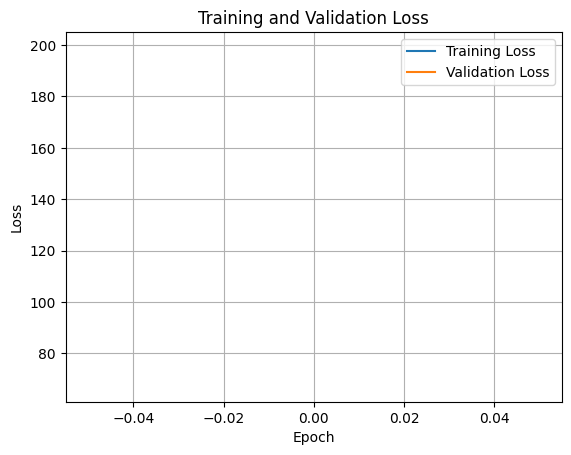

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Initialize the Kernel Ridge model with RBF kernel
rbf_model = KernelRidge(kernel='rbf', gamma=0.1) # You might need to tune gamma

# Train the model
rbf_model.fit(x, y)

print("Model training complete.")

Model training complete.


In [ ]:
# This cell is no longer needed as the plotting code has been moved.

Epoch 1/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1312.2771 - mse: 1312.2771
Epoch 2/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 193.5774 - mse: 193.5774
Epoch 3/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 152.4922 - mse: 152.4922
Epoch 4/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 125.9687 - mse: 125.9687
Epoch 5/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 103.9380 - mse: 103.9380
Epoch 6/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79.1025 - mse: 79.1025
Epoch 7/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52.3635 - mse: 52.3635
Epoch 8/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 45.0360 - mse: 45.0360
Epoch 9/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39.7188 - mse: 39.7188
Epoch 10/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 34.2365 - mse: 34.2365
Epoch 11/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.7743 - mse: 29.7743
Epoch 12/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 

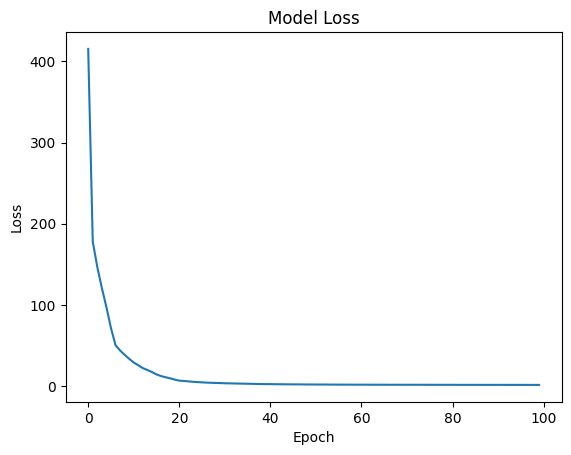

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
history = model.fit(x, y, epochs=100, batch_size=16)
model.save('Humidity_predictor_model.keras')
# Plot the loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 868 (3.39 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 435 (1.70 KB)

In [ ]:
load_model = tf.keras.models.load_model('Humidity_predictor_model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(load_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("humidity_predictor.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpxf6z9kd2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134565618497296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565618496336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565618497488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565618485776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565618496528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565618486736: TensorSpec(shape=(), dtype=tf.resource, name=None)


3608

In [ ]:
!xxd -i humidity_predictor.tflite > humidity_predictor.h

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DOCENCIA/Maestría/Maestria IoT/MAESTRIA-IOT/DISEÑO-INFRAESTRUCTURAS-INTELIGENTES/Guía de Laboratorio/EDGE-COMPUTING/LAB0/dataset_temperature.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

Epoch 1/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3871.2590 - mse: 3871.2590
Epoch 2/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 198.1861 - mse: 198.1861
Epoch 3/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 158.7557 - mse: 158.7557
Epoch 4/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 137.5823 - mse: 137.5823
Epoch 5/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 114.1097 - mse: 114.1097
Epoch 6/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 93.2347 - mse: 93.2347
Epoch 7/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73.4765 - mse: 73.4765
Epoch 8/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 61.4008 - mse: 61.4008
Epoch 9/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55.4940 - mse: 55.4940
Epoch 10/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.8848 - mse: 49.8848
Epoch 11/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44.5972 - mse: 44.5972
Epoch 12/100
789/789 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 

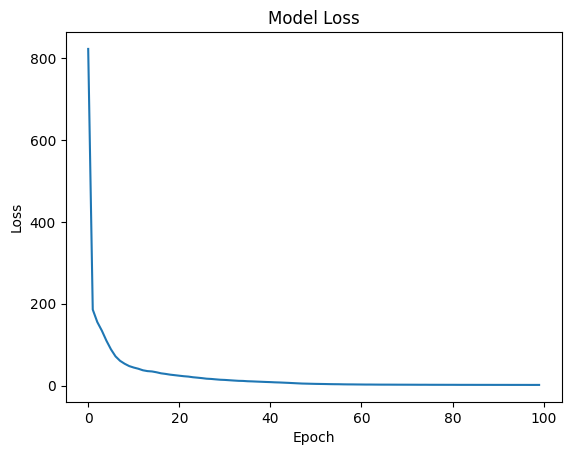

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
history = model.fit(x, y, epochs=100, batch_size=16)
model.save('Temperature_predictor_model.keras')
# Plot the loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 868 (3.39 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 435 (1.70 KB)

In [ ]:
load_model = tf.keras.models.load_model('Temperature_predictor_model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(load_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("temperature_predictor.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmp2x9l2na2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134565823708624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565823707664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565608430608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565608436944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565608437136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134565608438096: TensorSpec(shape=(), dtype=tf.resource, name=None)


3624

In [ ]:
!xxd -i temperature_predictor.tflite > temperature_predictor.h